In [208]:
import scipy.io as sio
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import sys
sys.path.append("../")


from scipy.optimize import curve_fit
def fitting(lst1, lst2):

    model1 = np.poly1d(np.polyfit(lst1, lst2, 10))

    polyline = np.linspace(min(lst1), max(lst1))

    return(polyline, model1(polyline))

### Tires and Conditions

In [192]:
tires = {"hoosier_18x6_10x7":{"long":None, "lat":None}}

camber = 0 # default camber
pressure = 12 * 6.89476 # default pressure
velocity = 25 * 1.60934 # default velocity
slip_angle = 0
run_num = 1

### Import Tire Data

In [219]:
for name, tire in tires.items():
    try:
        df = pd.read_csv(f"../tire_data/processed_data/braking_{name}_run{run_num}.csv")
        tire["long"] = df[(df["P"] == pressure) & (df["V"] == velocity) & (df["IA"] == camber) & (df["SA"] == slip_angle)]
        # print(tire["long"])
        
    except:
        print("Error getting long data for {0}".format(name))

    try:
        df = pd.read_csv(f"../tire_data/processed_data/cornering_{name}_run{run_num}.csv")
        tire["lat"] = df[(df["P"] == pressure) & (df["V"] == velocity) & (df["IA"] == camber)]
        # print(tire["lat"])

    except:
        print("Error getting lateral data for {0}".format(name))


### Verify that Data Makes Sense

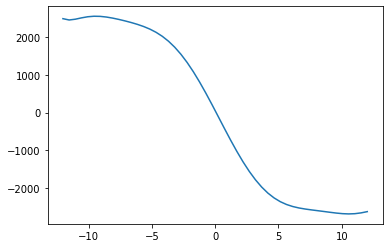

In [213]:
df = tires["hoosier_18x6_10x7"]["lat"]
temp_df = df[(df["FZ"] == -250 / 0.224809)]

# print(temp_df)
vals = fitting(temp_df["SA"].tolist(), temp_df["FY"].tolist())
plt.plot(vals[0], vals[1])

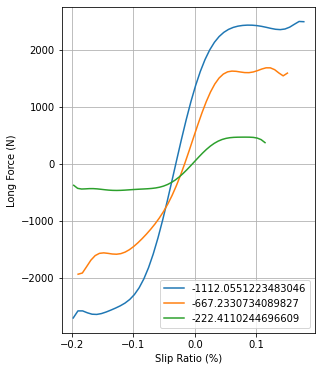

In [220]:
fig = plt.figure(figsize=(10,6))
count = 0
for name, tire in tires.items():
    if tire["long"] is not None:
        count += 1
        fig.add_subplot(1, 2, count)
        for load in tire["long"]["FZ"].unique():
            temp_df = tire["long"][tire["long"]["FZ"] == load]
            vals = fitting(temp_df["SR"].tolist(), temp_df["FX"].tolist())
            plt.plot(vals[0], vals[1], label = load)
            # plt.scatter(temp_df["SR"], temp_df["FX"], s=1)
            # plt.plot(temp_df["SR"], temp_df["FX"], label = load)
        plt.legend()
        plt.ylabel("Long Force (N)")
        plt.xlabel("Slip Ratio (%)")
        plt.grid(True)
plt.show()